In [1]:
import requests
import pandas as pd

In [2]:
from requests.exceptions import ConnectionError, Timeout, HTTPError, RequestException
import plotly.express as px


In [3]:
url = "https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data"


with requests.Session() as s:
   try:
        response = s.get(url, timeout = 10)
        response.raise_for_status()
        df = pd.read_html(response.content)[0]
        print("Data fetched succesfully")
        

   except ConnectionError:
         print("Failed to connect")

   except Timeout:
         print("The request Timedout")
   
   except HTTPError as e:
        print(f"HTTP error occured: {e}")

   except RequestException as e:
        print (f"An unexpected error occured: {e}")
        
# Requests data from the source URl, raises it for status.       
    

Data fetched succesfully


In [4]:
df

,Athlete,Country,Bronze,Silver,Gold,Grand Total
0,"LATYNINA, Larisa",Soviet Union,4,5,9,18
1,"PHELPS, Michael",United States,2,NaN,14,16
2,"ANDRIANOV, Nikolay",Soviet Union,3,5,7,15
3,"MANGIAROTTI, Edoardo",Italy,2,5,6,13
4,"ONO, Takashi",Japan,4,4,5,13
...,...,...,...,...,...,...
297,"YANG, Wei",China,NaN,2,3,5
298,"ZAMPORI, Giorgio",Italy,1,NaN,4,5
299,"ZATOPEK, Emil",Czechoslovakia,NaN,1,4,5
300,"ZUCHOLD, Erika",East Germany,1,4,NaN,5


In [5]:
# Removes the last row of the dataframe.
df = df.iloc[:-1]


In [6]:
df.nunique()
# Show

Athlete        301
Country         35
Bronze           6
Silver           6
Gold            10
Grand Total     12
dtype: int64

In [7]:
df.describe()
# Shows all the total count, unique values, and frequency of values of the columns. 

,Athlete,Country,Bronze,Silver,Gold,Grand Total
count,301,301,232,262,283,301
unique,301,35,6,6,10,12
top,"LATYNINA, Larisa",United States,1,1,3,5
freq,1,59,112,92,71,136


In [8]:
df.count()

Athlete        301
Country        301
Bronze         232
Silver         262
Gold           283
Grand Total    301
dtype: int64

In [9]:
# We fill the missing values with 0. 
df = df.fillna("0")

In [10]:
df.count()

Athlete        301
Country        301
Bronze         301
Silver         301
Gold           301
Grand Total    301
dtype: int64

In [11]:
# We split the Athlete column into two columns namely first_name and last_name. 
df[["Last_Name", "First_Name"]] =df["Athlete"].str.split(",", expand = True)


In [12]:
df

,Athlete,Country,Bronze,Silver,Gold,Grand Total,Last_Name,First_Name
0,"LATYNINA, Larisa",Soviet Union,4,5,9,18,LATYNINA,Larisa
1,"PHELPS, Michael",United States,2,0,14,16,PHELPS,Michael
2,"ANDRIANOV, Nikolay",Soviet Union,3,5,7,15,ANDRIANOV,Nikolay
3,"MANGIAROTTI, Edoardo",Italy,2,5,6,13,MANGIAROTTI,Edoardo
4,"ONO, Takashi",Japan,4,4,5,13,ONO,Takashi
...,...,...,...,...,...,...,...,...
296,"XIONG, Ni",China,1,1,3,5,XIONG,Ni
297,"YANG, Wei",China,0,2,3,5,YANG,Wei
298,"ZAMPORI, Giorgio",Italy,1,0,4,5,ZAMPORI,Giorgio
299,"ZATOPEK, Emil",Czechoslovakia,0,1,4,5,ZATOPEK,Emil


In [13]:
# We reorder the columns so that first_name and last_name columns are the first and second columns respectively.
new_order = ['First_Name', 'Last_Name'] + [col for col in df.columns if col not in ['First_Name', 'Last_Name']]

In [14]:
df = df[new_order]

In [15]:
# We change the last name column so that the letters are in proper case instead of all uppercase. 
df["Last_Name"] = df["Last_Name"].str.title()

In [16]:
# We drop the Athlete column because it is redundant.
df = df.drop("Athlete", axis = "columns")

In [17]:
df

,First_Name,Last_Name,Country,Bronze,Silver,Gold,Grand Total
0,Larisa,Latynina,Soviet Union,4,5,9,18
1,Michael,Phelps,United States,2,0,14,16
2,Nikolay,Andrianov,Soviet Union,3,5,7,15
3,Edoardo,Mangiarotti,Italy,2,5,6,13
4,Takashi,Ono,Japan,4,4,5,13
...,...,...,...,...,...,...,...
296,Ni,Xiong,China,1,1,3,5
297,Wei,Yang,China,0,2,3,5
298,Giorgio,Zampori,Italy,1,0,4,5
299,Emil,Zatopek,Czechoslovakia,0,1,4,5


In [18]:
def extract (df,url):
    with requests.Session() as s:
         try:
            response = s.get(url, timeout = 10)
            response.raise_for_status()
            df = pd.read_html(response.content)[0]
             
            print("Data fetched succesfully")
            return(df)
        

         except ConnectionError:
             print("Failed to connect")

         except Timeout:
             print("The request Timedout")
   
         except HTTPError as e:
             print(f"HTTP error occured: {e}")

         except RequestException as e:
             print (f"An unexpected error occured: {e}")
        
   

In [19]:
def remove_last_row(df):
    df = df.iloc[:-1]
    return df
    
def fill_missing_with_zero(df):
    df = df.fillna("0")
    return df
    
def update_name_formating(df):
    df[["Last_Name", "First_Name"]] =df["Athlete"].str.split(",", expand = True)
    df["Last_Name"] = df["Last_Name"].str.title()
    df = df.drop("Athlete", axis = "columns")
    return df
    
def reordering_column(df):
    new_order = ['First_Name', 'Last_Name'] + [col for col in df.columns if col not in ['First_Name', 'Last_Name']]
    df = df[new_order]
    return df
    

In [20]:
def load(df, output_file):
    df.to_csv(output_file, index = False)

In [21]:
df = (pd.DataFrame().
      pipe(extract, url).
      pipe(remove_last_row).
      pipe(fill_missing_with_zero).
      pipe(update_name_formating).
      pipe(reordering_column).
      pipe(load, "list-of-olympic-medal-winners.csv"))

Data fetched succesfully


In [22]:
dfn = pd.read_csv("list-of-olympic-medal-winners.csv")
# Load the newly saved csv file. 

In [50]:
dfn.sort_values(by = "Gold", ascending = False)
# Sort the values by descending order based on the total number of Gold medals won by each athlete. 

,First_Name,Last_Name,Country,Bronze,Silver,Gold,Grand Total
1,Michael,Phelps,United States,2,0,14,16
9,Paavo,Nurmi,Finland,0,3,9,12
23,Carl,Lewis,United States,0,1,9,10
17,Mark,Spitz,United States,1,1,9,11
0,Larisa,Latynina,Soviet Union,4,5,9,18
...,...,...,...,...,...,...,...
252,William,Merz,United States,4,1,0,5
205,Gustav,Fischer,Switzerland,2,3,0,5
280,Miho,Takeda,Japan,1,4,0,5
279,Miya,Tachibana,Japan,1,4,0,5


In [60]:
# Group by country to see the total number of medals won by each country in descending order. 
df = dfn.groupby(by = "Country").sum("Gold").sort_values("Gold", ascending  = False).reset_index()

In [62]:
df

,Country,Bronze,Silver,Gold,Grand Total
0,United States,66,93,228,387
1,Soviet Union,44,77,92,213
2,Hungary,23,29,56,108
3,East Germany,23,36,51,110
4,Italy,24,34,50,108
5,Romania,18,21,47,86
6,Japan,24,32,43,99
7,Australia,18,33,37,88
8,China,7,19,33,59
9,France,22,27,31,80


In [146]:
# Create a pie chart to see what percentage of total medals are won by each country.
pie_chart = px.pie(df, names = "Country", values = "Gold", title = "Olympic gold medals by country",
                  width = 900, height = 600)

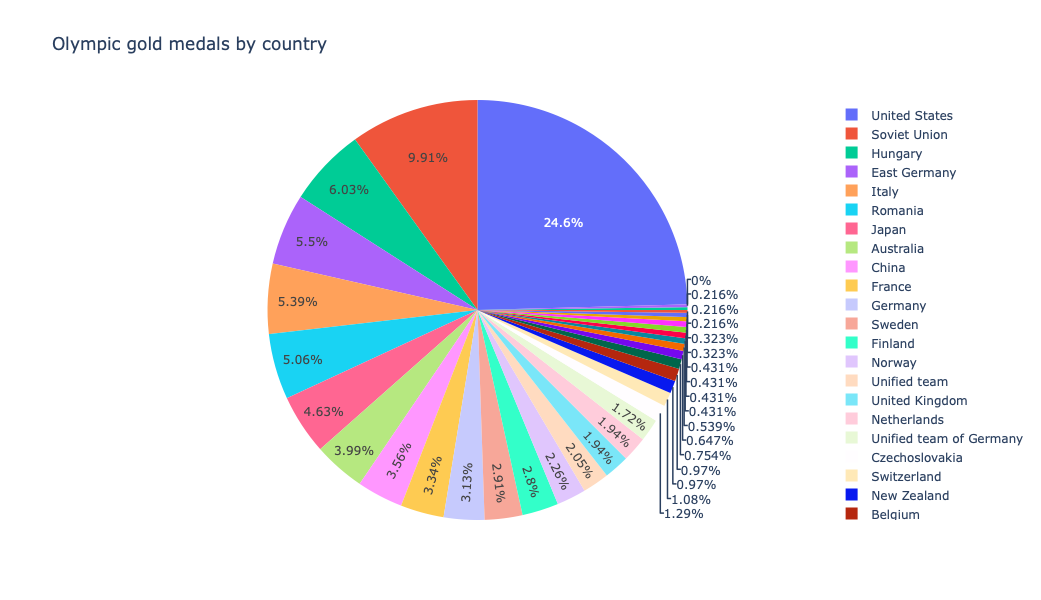

In [148]:
pie_chart.show()

In [88]:
# Create a bar chart to visualize the difference between countries in terms of gold medals won.
bar_chart = px.bar(df, x = "Country", y = "Gold", labels = "Gold")

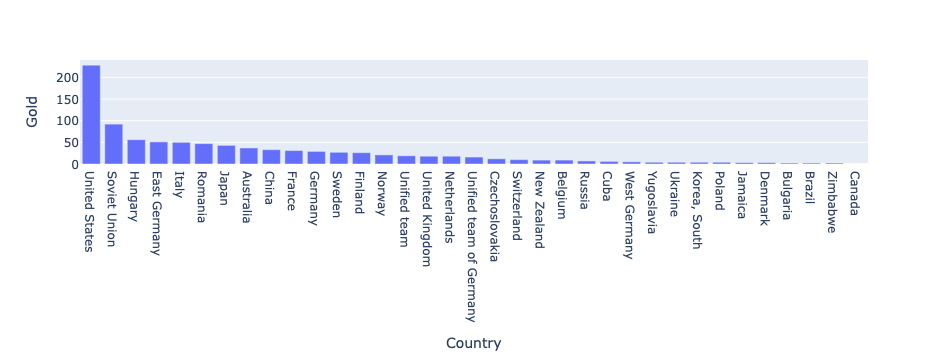

In [90]:
bar_chart.show()

In [116]:
# To get the top ten gold medal winners for the United States, get all the dataframe values where the country is the US. 
dfn_us = dfn[dfn["Country"]  == "United States"]

In [120]:
dfn_us.head()

,First_Name,Last_Name,Country,Bronze,Silver,Gold,Grand Total
1,Michael,Phelps,United States,2,0,14,16
10,Jenny,Thompson,United States,1,3,8,12
11,Dara,Torres,United States,4,4,4,12
12,Matthew,Biondi,United States,1,2,8,11
15,Natalie,Coughlin,United States,4,4,3,11


In [130]:
# Sort the values in descending order based on the number of Gold medal by athlete. Then using iloc to get the first ten values.
top_ten_winners = dfn_us.sort_values("Gold", ascending = False).iloc[:10] 

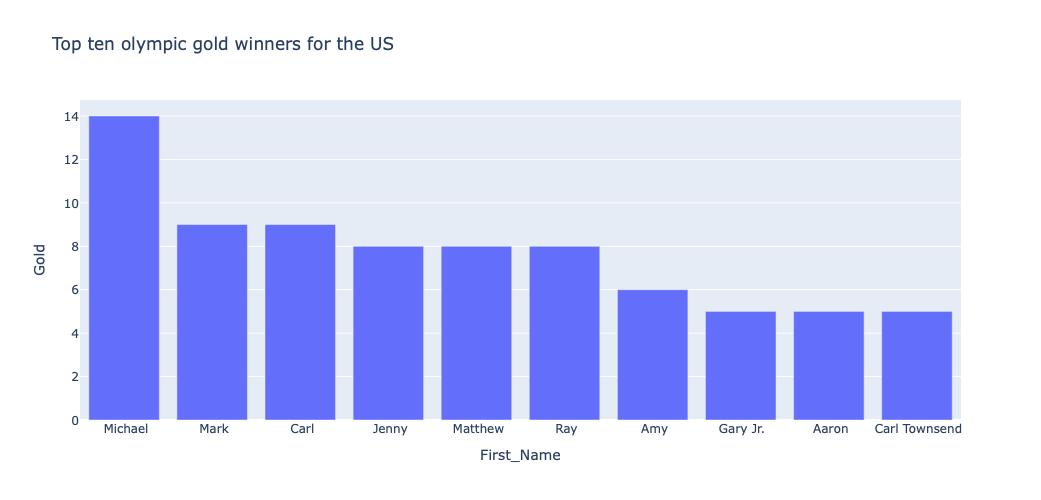

In [144]:
# Bar plot of the top ten gold medal winners for the US.
bar_plot = px.bar(top_ten_winners, x = "First_Name", y = "Gold", title = "Top ten olympic gold winners for the US", height = 500)
bar_plot.show()